I am a beginner to Data Science field and Machine Learning models. Below is the first round of my work, after many stumbling and iterations, on the Titanic dataset to understand the breadth and width of both topics.

# Aims

Step 1 Get a simple Machine Learning model to work -> DONE

Step 2 Work on improving the Training Data, e.g. from the view of creating a new column etc. 

Step 3 Work on adding complex models

Step 4 Do Cross Validation

I wrote these aims as reference points before getting started with the work. The aims are not fixed in stone. They can be changed depending on my level of understanding of Data Science. 

**Note**

Below codes are by default added when you created a new Notebook

In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Inspirations:

* Professor Andrew Ng´s Machine Learning course in Coursera
* Courses from Kaggle.com: 
    * Python, 
    * Intro to Machine Learning, 
    * Intermediate Machine Learning, 
    * Pandas, 
    * and Microchallenges
* https://www.kaggle.com/ydalat/titanic-a-step-by-step-intro-to-machine-learning
* https://www.kaggle.com/alexisbcook/missing-values
* https://www.kaggle.com/code1110/houseprice-data-cleaning-visualization/comments#262739
* https://www.kaggle.com/startupsci/titanic-data-science-solutions
* https://www.kaggle.com/dansbecker/cross-validation
* https://medium.com/kaggle-blog/i-trained-a-model-what-is-next-d1ba1c560e26?source=collection_home---4------0-----------------------
* Book: Introducing Data Science, Big Data, Machine Learning, and more, using Python tools
* Book: Hands-On Machine Learning with Scikit-Learn and TensorFlow 2nd edition
* https://www.kaggle.com/questions-and-answers/161303
* https://www.theodinproject.com/paths/foundations/courses/foundations/lessons/git-basics

In [68]:
# Load libraries for analysis and visualization
import matplotlib.pyplot as plt 

# Machine learning libraries
import seaborn as sns  

# https://github.com/ResidentMario/missingno -> using missingno functionality
# Bilogur, (2018). Missingno: a missing data visualization suite. Journal of Open Source Software, 3(22), 547, 
# https://doi.org/10.21105/joss.00547
import missingno as msno

**Notes**

Since I created this notebook from "Code" -> "New Notebook", I MUST MANUALLY add the Titanic train.csv and test.csv.

How to add MANUALLY those 2 files:

* Go to upper right hand corner of the notebook
* Go to "+ Add Data" -> click on it
* Go to "Competition Data" 
* Seek Titanic
* Click "Add" button

et voilà!

If I created the notebook out of the Titanic Competition, then the Kaggle system would have attached those 2 csv files AUTOMATICALLY.

# **Get your hands dirty:**

**Beginning of the process**

What I understand so far, before starting work on Machine Learning / Data Science assignment, is to know what is your objective of the work. 

**Excerpt from the book: Introducing Data Science, Big Data, Machine Learning, and more, using Python tools. **

--> *Step 1: Defining reseach goals and creating a project charter*

**Excerpt from the book: Hands-On Machine Learning with Scikit-Learn and TensorFlow book 2nd edition. **

==> *Look at the Big Picture -> Frame the Problem*

***My answer***

Here, basically I want to find out from the test.csv, who died and who survived.

**Next step of the process**

--> *Step 2: Retrieving data*

==> *Get the Data*

In [69]:
# to read those 2 files, and to assign them to the 2 variables
Titanic_train_data = pd.read_csv('../input/titanic/train.csv')
Titanic_test_data = pd.read_csv('../input/titanic/test.csv')

**Next step of the process**

--> *Step 3: Cleansing, integrating, and transforming data*

==> *Discover and Visualize the Data to Gain Insights*

In [70]:
# provide the first 5 rows of Titanic_train_data (This variable is a DataFrame)
Titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
print(Titanic_train_data.shape, "----> shows the Row x Column of the DataFrame ")

(891, 12) ----> shows the Row x Column of the DataFrame 


In [72]:
# this provides quick description of the data inside the DataFrame
# it shows the details of each column in terms of how many records/rows are NOT null, and type of each column
print(Titanic_train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


<AxesSubplot:>

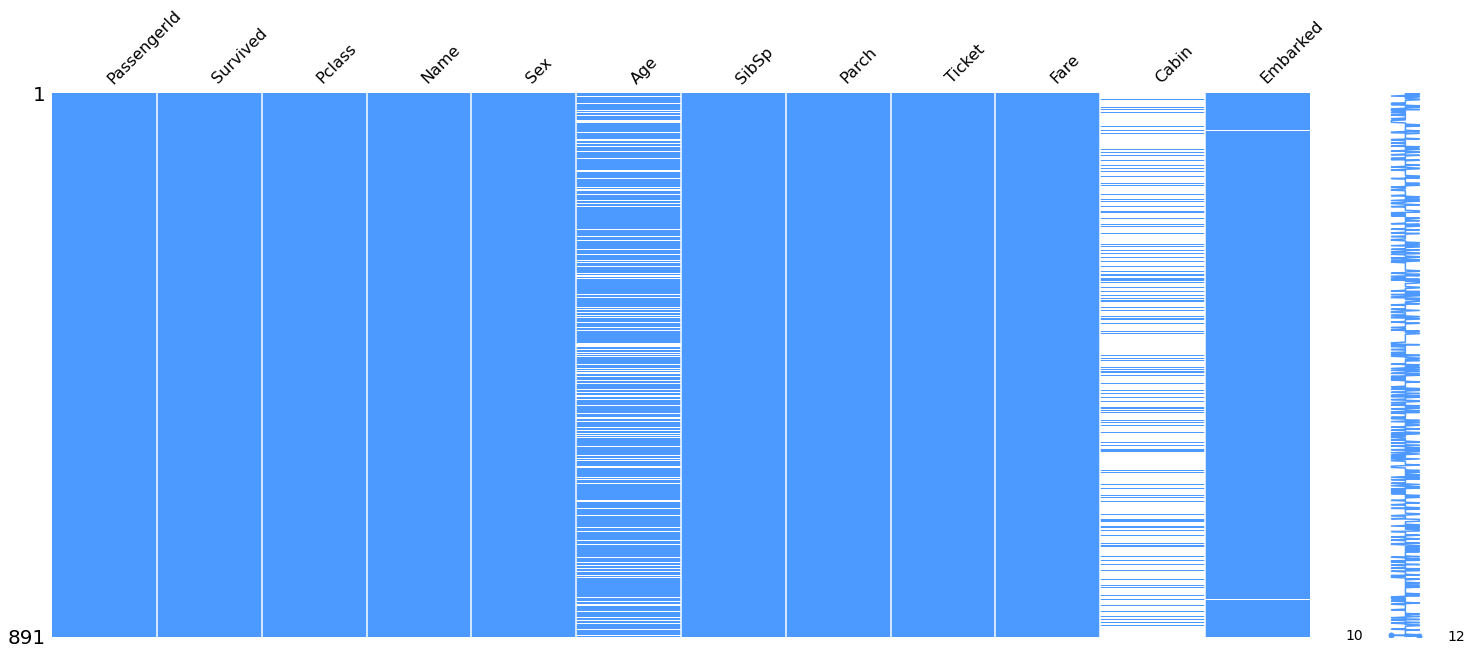

In [73]:
# The white lines are Null values (NaN)
msno.matrix(Titanic_train_data, color = (0.30, 0.60, 1.00) )

**Repeat the codes for test_data:**


>      Titanic_test_data.head()

>      print(Titanic_test_data.shape, "--> shows the Row x Column of the DataFrame ")

>      print(Titanic_test_data.info())

>      msno.matrix(Titanic_test_data)


**Next step of the process**

--> *Step 4: Exploratory data analysis*

==> *Prepare the Data for Machine Learning Algorithms*

In [74]:
# shows Columns with NaN records
trainData_cols_with_missing = [colu for colu in Titanic_train_data
                     if Titanic_train_data[colu].isnull().any()]

trainData_cols_with_missing

['Age', 'Cabin', 'Embarked']

In [75]:
# shows Columns with NaN records, and the number of the records
print('-'*30 + 'training data' + '+'*30)
for i in np.arange(Titanic_train_data.shape[1]): # [1] = grabs all Columns -> then go through each Column
    n = Titanic_train_data.iloc[:,i].isnull().sum() # sums NaN records in each Column
    if n > 0:
        print(list(Titanic_train_data.columns.values)[i] + ': ' + str(n) + ' NaNs')

------------------------------training data++++++++++++++++++++++++++++++
Age: 177 NaNs
Cabin: 687 NaNs
Embarked: 2 NaNs


**Repeat the codes for test_data:**

>       print('-'*30 + 'test data' + '+'*30)

>       for i in np.arange(Titanic_test_data.shape[1]):

>       n = Titanic_test_data.iloc[:,i].isnull().sum()

>       if n > 0:

>       print(list(Titanic_test_data.columns.values)[i] + ': ' + str(n) + ' NaNs')

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


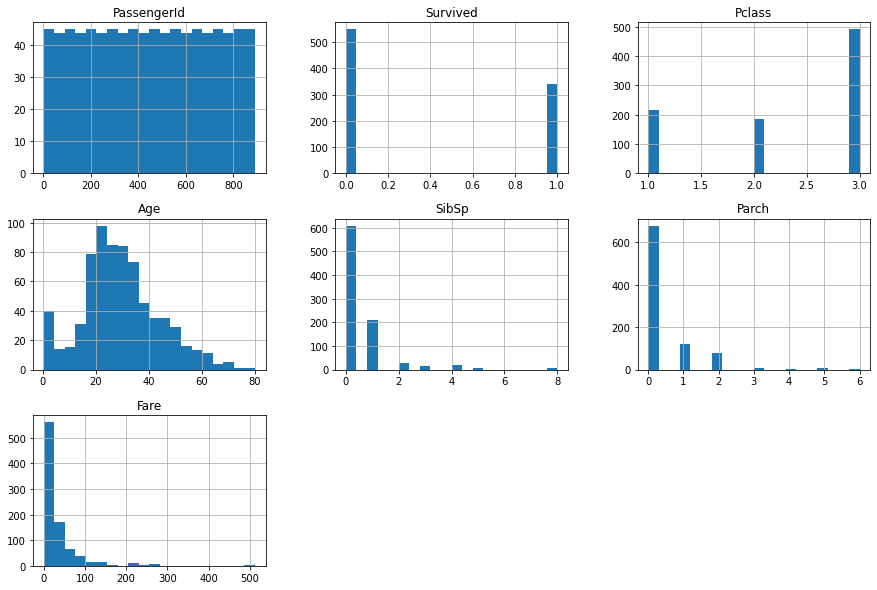

In [76]:
# plots a histogram for each numerical attribute, i.e. a column contains integer type
Titanic_train_data.hist(bins=20, figsize=(15,10)) 

# figsize(r,c) ===> r x c: r = number of rows from 1, c = # of columns from 1
# https://www.pythonpool.com/matplotlib-figsize/ 
# --> Width – Here, we have to input the width in inches. The default width is 6.
# --> Height – Here, we have to input the height of the graph. The default value is 4. 

plt.show()

In [77]:
# filters Titanic_train_data by Survived = 1 (i.e. alive), outputs Sex and Survived columns, where grouping the outputs by Sex
# decomposes "Survived" feature / column
Titanic_train_data.loc[Titanic_train_data.Survived == 1][['Sex','Survived']].groupby(['Sex'], as_index=False).count()

,Sex,Survived
0,female,233
1,male,109


In [78]:
# filters Titanic_train_data by Survived = 0 (i.e. dead), outputs Sex and Survived columns, where grouping the outputs by Sex
# decomposes "Survived" feature / column
Titanic_train_data.loc[Titanic_train_data.Survived == 0][['Sex','Survived']].groupby(['Sex'], as_index=False).count()

,Sex,Survived
0,female,81
1,male,468


Text(0.5, 1.0, 'Total passengers grouping by Age that died')

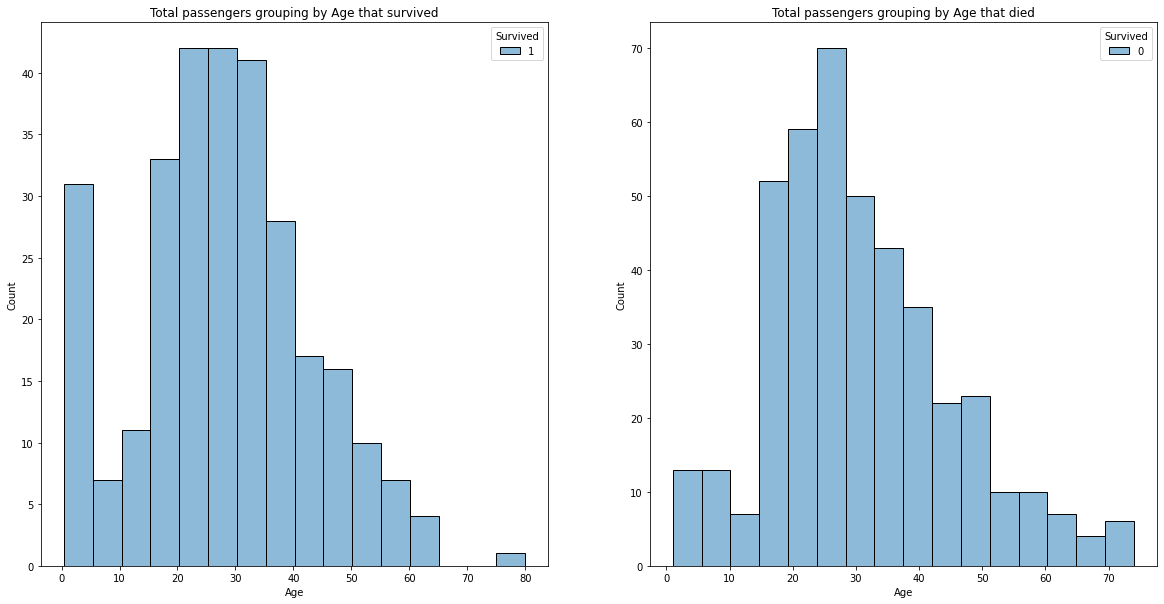

In [79]:
Surv = Titanic_train_data.loc[Titanic_train_data.Survived == 1]
NoSurv = Titanic_train_data.loc[Titanic_train_data.Survived == 0]

figure, axs = plt.subplots(1, 2, figsize=(20,10)) 

sns.histplot(x='Age',hue='Survived',data=Surv, ax=axs[0]) # axis starts from 0
sns.histplot(x='Age',hue='Survived',data=NoSurv, ax=axs[1]) 

axs[0].set_title('Total passengers grouping by Age that survived')
axs[1].set_title('Total passengers grouping by Age that died')

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 60.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 32.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


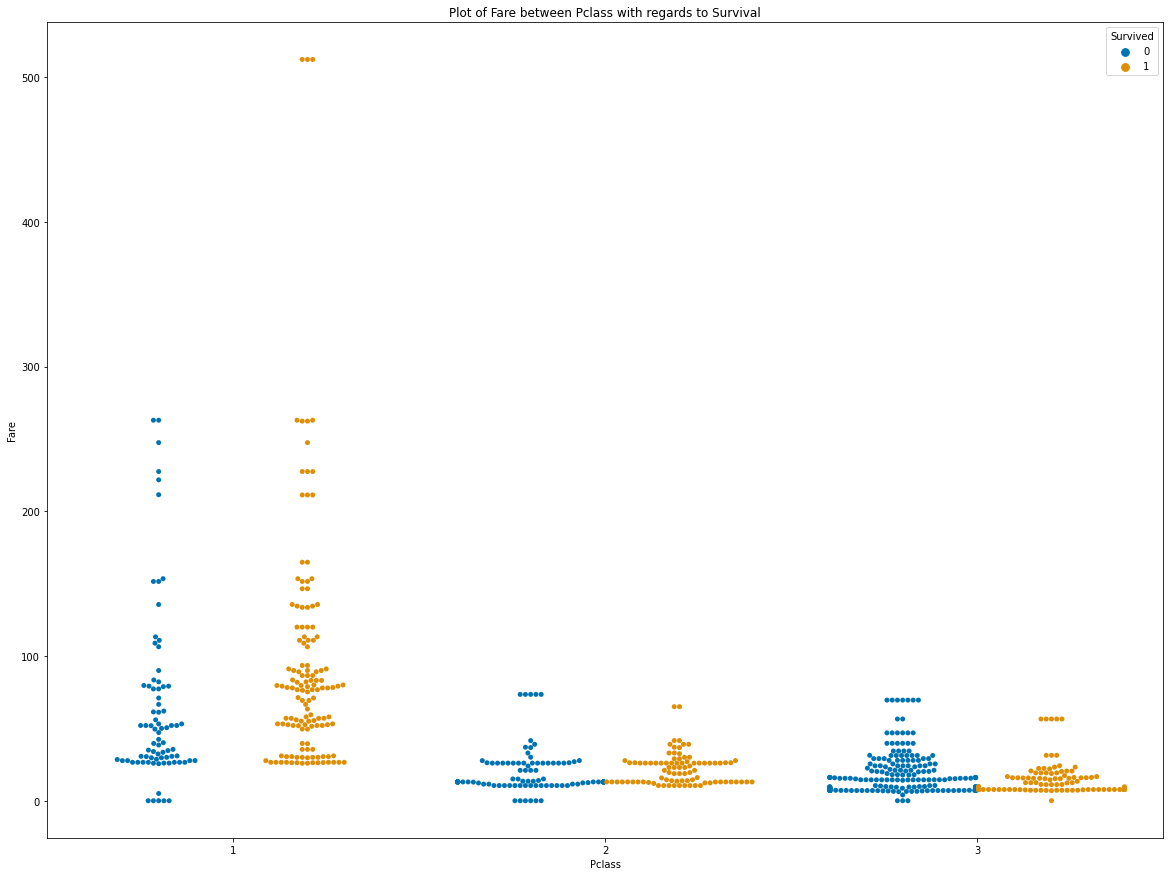

In [80]:
plt.figure(figsize=(20,15))

SeabornSwarmPlot = sns.swarmplot(x='Pclass',y='Fare',hue='Survived',data=Titanic_train_data, palette='colorblind', dodge=True)
# for values of palette = https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
# https://seaborn.pydata.org/examples/palette_choices.html?highlight=palette

SeabornSwarmPlot.set_title('Plot of Fare between Pclass with regards to Survival')

plt.show()

**Note**

Find out why the error warning pops up, below is an example:

" /opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning) "

It seems that either I am using the wrong plot function, or the current size of the swarmplot is small that it does not accommodate all the data. 

In [81]:
# there are 177 NaNs in Age column. 
# Model in Machine Learning cannot accept Null. So either remove the Age column OR add a "value" in those 177 records.

trainDataImputed = Titanic_train_data.copy()
print(trainDataImputed['Age'].mean(), "mean before Imputation") # 29.69911764705882
print(trainDataImputed['Age'].sum(),"sum before Imputation") # 21205.17

trainDataImputed['Age'] = trainDataImputed['Age'].fillna(trainDataImputed['Age'].mean())

print(trainDataImputed['Age'].mean(),"mean after Imputation") # 29.699117647058763 
print(trainDataImputed['Age'].sum(),"sum after Imputation") # 26461.91382352941

print(trainDataImputed.info()) 

29.69911764705882 mean before Imputation
21205.17 sum before Imputation
29.699117647058763 mean after Imputation
26461.91382352941 sum after Imputation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Quick observations

* At this stage, to remove Cabin column.
* Reason is it is 204 filled with values (204/891 = 22.90%)
* To think about. How does the Cabin column contribute to Survival, if any?


* Also, I remove Name column, because I do not know how to manipulate it at this stage.
* My feeling is there could be racist bias towards Non "American" at that time.
* E.g. anyone with Irish name, or maybe Italian name?

In [82]:
# Interesting observation

# to find people who have Ticket = 113803
# So far I know Index = 3, PassengerId = 4, Female, SibSp = 1, Survived = 1, Pclass = 1, owned that Ticket
trainDataImputed.loc[trainDataImputed.Ticket == '113803']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1,C123,S


In [83]:
print("This shows an example of SibSp= 1 and same Ticket")
print("They were a couple. And also, of course, shared the same Cabin = C123")
print("Pclass =1, so Upper class")
print("The wife Survived but not the husband. Shows that Male did NOT survive eventhough on Upper class")

This shows an example of SibSp= 1 and same Ticket
They were a couple. And also, of course, shared the same Cabin = C123
Pclass =1, so Upper class
The wife Survived but not the husband. Shows that Male did NOT survive eventhough on Upper class


In [84]:
# Interesting observation

# to find people who have Ticket = W./C. 6607
# So far I know index = 888, PassengerId = 889, Female, SibSp = 1, Parch= 2, Survived = 0, Pclass = 3, owned that Ticket
trainDataImputed.loc[trainDataImputed.Ticket == 'W./C. 6607']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
783,784,0,3,"Johnston, Mr. Andrew G",male,29.699118,1,2,W./C. 6607,23.45,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,NaN,S


In [85]:
print("This shows an example of SibSp= 1, Parch = 2 and same Ticket")
print("Note that both were missing Age. So now it uses Mean age of the column")
print("I think the guy is the father, and the woman is the daughter, hence Parch = 2")
print("Both were in Pclass = 3, lower class, and both were dead")
print("Here irregardless she was a Female, she did not surive")

This shows an example of SibSp= 1, Parch = 2 and same Ticket
Note that both were missing Age. So now it uses Mean age of the column
I think the guy is the father, and the woman is the daughter, hence Parch = 2
Both were in Pclass = 3, lower class, and both were dead
Here irregardless she was a Female, she did not surive


Based on what I investigated so far, in the Training Data (Titanic_train_data)

**I want to retain:**
* Pclass -> Upper class seem to likely survive
* Sex -> More Females survived than Males
    * Surived Female 233 (68,13%)
    * Survived Male 109 (31,87%)
    * Percentage survived Female in relative to total passengers (= 233 / 891) = 26.15%
    * Percentage survived Male in relative to total passengers (= 109 / 891) = 12.23%

* Age -> Needs further refinement in analysis. So far I have weak reasoning. I need to break this down more in terms of Pclass.
    * 30+ kids aged 0 to 5 survived in comparison to 12+ who did not.  
    * Another outlier aged 75 to 80 who survived.
* Fare -> It seems if you paid more and in Pclass 1, you were likely to survive.

**To remove:**
* PassengerId -> No info
* Survived -> this is what we WANT to PREDICT

**Neutral**
* Cabin -> shows additional info, but I do not know how to proceed. Put as To remove at the moment.
* Embarked -> i do not know how this contributes or to analyse to survival. Put as To remove at the moment.
* SibSp -> shows additional info, but I do not know how to proceed. Put as To remove at the moment.
* Parch -> shows additional info, but I do not know how to proceed. Put as To remove at the moment.
* Ticket -> shows additional info, but I do not know how to proceed. Put as To remove at the moment.
* Name -> shows additional info, but I do not know how this contributes or to analyse to survival. Put as To remove at the moment.


**Modify Sex column in the Training data**

To change values in Sex column to Integer from String

e.g Female = 0, Male = 1

In [86]:
trainDataImputed['Sex']=trainDataImputed['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

print(trainDataImputed['Sex'], "----> after remapping the String to Integer")
# it works here regarding Map(). I did this directly onto the Series "Sex" inside the trainDataImputed DataFrame

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64 ----> after remapping the String to Integer


In [87]:
# so based on above, drops the relevant columns
newTrainDataImputed = trainDataImputed.drop(['PassengerId','Survived','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis=1)

newTrainDataImputed

,Pclass,Sex,Age,Fare
0,3,1,22.000000,7.2500
1,1,0,38.000000,71.2833
2,3,0,26.000000,7.9250
3,1,0,35.000000,53.1000
4,3,1,35.000000,8.0500
...,...,...,...,...
886,2,1,27.000000,13.0000
887,1,0,19.000000,30.0000
888,3,0,29.699118,23.4500
889,1,1,26.000000,30.0000


In [88]:
# check if there is a missing value/Null/NaN in the above columns
# copied from https://www.kaggle.com/alexisbcook/missing-values

cols_with_missing = [col for col in newTrainDataImputed
                     if newTrainDataImputed[col].isnull().any()]

cols_with_missing

[]

# Prepare the required variables to FIT a model and PREDICT "Survived" in the Test data

In [89]:
# set the relevant variables for the Training Data

y_train = Titanic_train_data['Survived']
X_train = newTrainDataImputed

In [90]:
# I must drop columns in the Test data.
# These columns come from the analysis I did from above. 

X_test = Titanic_test_data.copy()
X_test = X_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis=1)

# I must change the Sex to 0 and 1
X_test['Sex']=X_test['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

X_test.describe()

,Pclass,Sex,Age,Fare
count,418.000000,418.000000,332.000000,417.000000
mean,2.265550,0.636364,30.272590,35.627188
std,0.841838,0.481622,14.181209,55.907576
min,1.000000,0.000000,0.170000,0.000000
25%,1.000000,0.000000,21.000000,7.895800
50%,3.000000,1.000000,27.000000,14.454200
75%,3.000000,1.000000,39.000000,31.500000
max,3.000000,1.000000,76.000000,512.329200


We still have missing values in Age and Fare columns, 86 and 1 respectively.

In [91]:
# I must replace NaN (Null value) to Mean value of the Age column

print(X_test['Age'].mean(), "mean before Imputation") # 30.272590361445783
print(X_test['Age'].sum(),"sum before Imputation") # 10050.5
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].mean())
print(X_test['Age'].mean(),"mean after Imputation") # 30.272590361445815 
print(X_test['Age'].sum(),"sum after Imputation") # 12653.942771084337

print("------")

# I must replace 1 NaN value in Fare, from the initial analysis
# Use Mean value

print(X_test['Fare'].mean(), "mean Fare before Imputation") # 35.6271884892086
print(X_test['Fare'].sum(),"sum Fare before Imputation") # 14856.5376
X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].mean())
print(X_test['Fare'].mean(),"mean Fare after Imputation") # 35.6271884892086
print(X_test['Fare'].sum(),"sum Fare after Imputation") # 14892.164788489208

X_test.describe()

30.272590361445783 mean before Imputation
10050.5 sum before Imputation
30.272590361445815 mean after Imputation
12653.942771084337 sum after Imputation
------
35.6271884892086 mean Fare before Imputation
14856.5376 sum Fare before Imputation
35.6271884892086 mean Fare after Imputation
14892.164788489208 sum Fare after Imputation


,Pclass,Sex,Age,Fare
count,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,30.272590,35.627188
std,0.841838,0.481622,12.634534,55.840500
min,1.000000,0.000000,0.170000,0.000000
25%,1.000000,0.000000,23.000000,7.895800
50%,3.000000,1.000000,30.272590,14.454200
75%,3.000000,1.000000,35.750000,31.500000
max,3.000000,1.000000,76.000000,512.329200


In [92]:
# to double check if there is still a missing value/Null/NaN in the above columns

X_test_cols_with_missing = [COLUMN for COLUMN in X_test
                     if X_test[COLUMN].isnull().any()]

X_test_cols_with_missing

[]

All good for the Test data. 

**Next step of the process**

--> *Step 5: Build the models*

==> *Select and Train a Model*

**Important note**

https://www.kaggle.com/dansbecker/handling-missing-values

Most libraries (including scikit-learn) will give you an error if you try to build a model using data with missing values. 

Thus, ensure there is NO missing value / Null value / NaN in any of the columns that you want to use for prediction. 

* I.e. you select Columns A, B, and K in the test DataFrame. 
* These are used for the prediction.
* You have selected a Model PQR to do the prediction.
* If 1 record in Column K contains no value, then Model PQR will show error message.

In [93]:
#import models

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

In [94]:
model_RFR = RandomForestRegressor(n_estimators = 100, random_state = 0)
model_RFR.fit(X_train,y_train)
print(model_RFR.fit(X_train,y_train), "---> model_RFR.fit(X_train,y_train)")

preds_RFR = model_RFR.predict(X_test)
print(preds_RFR, "---> preds_RFR")

RandomForestRegressor(random_state=0) ---> model_RFR.fit(X_train,y_train)
[0.13       0.22       0.61       0.62       0.52       0.1425
 0.13       0.14       0.96       0.01       0.01       0.12883333
 1.         0.32       1.         1.         0.03902381 0.7
 0.86       0.22       0.03       0.79       1.         0.34
 1.         0.02       1.         0.66       0.74       0.1
 0.01       0.06       0.86       0.21       0.54357143 0.23
 0.07       0.04       0.02       0.58990476 0.0395     0.50105556
 0.12       1.         1.         0.0275     0.21316667 0.09409177
 1.         0.88       0.69       0.02       0.99       1.
 0.06       0.         0.         0.01       0.04       1.
 0.05       0.42933333 0.03043478 0.95923077 0.66       0.91
 0.74       0.03       0.11       1.         0.60577214 0.02
 0.5        0.34       1.         0.31       0.         0.93
 0.01       0.60577214 0.93       0.11       0.3005     0.01
 0.04       0.08       0.91       0.71       0.26131111 0.

The output is WRONG! It does not provide 1 or 0 for survival.

Why this happened?

Error 1:
* Error when want to use Random Forest Regressor.
* You have categorical data, but your model needs something numerical. 
* This happened when I did not change the values "Female" and "Male" in the "Sex" column to numbers such as "10" and "500".
* From a Kaggle's explanation "See our one hot encoding tutorial for a solution": https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding

This fixed only symptom instead of the root cause of the error.

Error 2:
This is the root cause of the error.

* The issue is the Titanic problem is a CLASSIFICATION instead of REGRESSION topic
* Here the Regression model is predicting value for Survival for Person ABC.
* I want to classify if Person ABC died or alive.

What to do next time?

**Ensure I understand what the issue/objective is.**


In [95]:
model_RFC = RandomForestClassifier(n_estimators = 100, random_state = 0)
model_RFC.fit(X_train,y_train)
print(model_RFC.fit(X_train,y_train), "---> model_RFC.fit(X_train,y_train)")
preds_RFC = model_RFC.predict(X_test)
print(preds_RFC, "---> preds_RFC")

RandomForestClassifier(random_state=0) ---> model_RFC.fit(X_train,y_train)
[0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 1 0 1 0 0 0] ---> preds_RFC


In [96]:
model_LogReg = LogisticRegression(random_state=0)
model_LogReg.fit(X_train,y_train)
print(model_LogReg.fit(X_train,y_train), "---> model_LogReg.fit(X_train,y_train)")
preds_LogReg = model_LogReg.predict(X_test)
print(preds_LogReg, "---> preds_LogReg")

LogisticRegression(random_state=0) ---> model_LogReg.fit(X_train,y_train)
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0] ---> preds_LogReg


In [97]:
output = pd.DataFrame({'PassengerId': Titanic_test_data.PassengerId, 'Survived': preds_RFR})
output.to_csv('trial01_RFR_submission.csv', index=False) #trial 01 = RandomForestRegressor
print("Your submission was successfully saved!")
# Public score = 0

Your submission was successfully saved!


In [98]:
output = pd.DataFrame({'PassengerId': Titanic_test_data.PassengerId, 'Survived': preds_RFC})
output.to_csv('trial02_RFC_submission.csv', index=False) #trial 02 = RandomForestClassifier
print("Your submission was successfully saved!")
# Public score = 0.76315

Your submission was successfully saved!


In [99]:
output = pd.DataFrame({'PassengerId': Titanic_test_data.PassengerId, 'Survived': preds_LogReg})
output.to_csv('trial03_LogReg_submission.csv', index=False) #trial 03 = LogisticRegression
print("Your submission was successfully saved!")
# Public score = 0.75598

Your submission was successfully saved!


# Next actions

For my next iterations of the analysis, I want and would like to do the following: 

* Add "Pipeline"
* Add "Feature Engineering"
    * For example
        * Add new "Title" column
        > trainDataImputed['Title'] = trainDataImputed['Name'].str.extract(' ([A-Za-z]+)\.', expand=True)
        
        > pd.crosstab(trainDataImputed['Title'], trainDataImputed['Sex'])
* Create a function that runs the FIT, and PREDICT automatically
* Add "Correlations"
* Add "Scatter Matrix"
* Add "SimpleImputer"
* Add shortcut to have multiple Models https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python
    * For example 
        > from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier)
* Add "Confusion matrix"
* Play with "mean_absolute_error"
   > from sklearn.metrics import mean_absolute_error
   
   > print(mean_absolute_error(y_true_value, y_prediction_value))
* Add "Cross Validation"
    > from sklearn.model_selection import cross_val_score
        
    > scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')

# Relevant links for this analysis

* https://github.com/shafier/Kaggle_Titanic
    * Find my codes here in the GitHub.
